## Đổi tên file ảnh

In [3]:
import os

folder_path = "./Flower/"
subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]


for subfolder in subfolders:
    path = os.path.join(folder_path, subfolder)
    files = os.listdir(path)
    files.sort()
    new_prefix =  subfolder
    
    for i, file_name in enumerate(files):
        new_name = new_prefix + str(i+1).zfill(2) + ".png"
        os.rename(os.path.join(path, file_name), os.path.join(path, new_name))

In [13]:
%reset

## Tách đặc trưng lưu vào file

In [3]:
from Feature import Feature
from PIL import Image
import numpy as np
import json

import os
folder_path = './Flower/'
subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]

feature_data = []
feature = Feature()
for subfolder in subfolders:
    # Lấy danh sách các tệp trong thư mục
    files = os.listdir(os.path.join(folder_path, subfolder))
    
    for file_name in files:
        data = {}
        data['label'] = subfolder
        # Đọc ảnh
        img = Image.open(os.path.join(folder_path, subfolder, file_name))
        img = np.array(img)
        # Tính toán đặc trưng
        color_feature = feature.color_histogram(img)
        hog_feature = feature.hog(img)
        data['color_feature'] = color_feature.tolist()
        data['hog_feature'] = hog_feature.tolist()
        feature_data.append(data)

data = {}
data['data'] = feature_data

# Lưu biến feature_data ra file JSON
with open('data2.json', 'w') as f:
    json.dump(data, f)

## Test

In [5]:

import json
import numpy as np
from PIL import Image
from Feature import Feature

# Đọc dữ liệu từ file JSON
with open('data.json', 'r') as f:
    data = json.load(f)

# Lấy dữ liệu'
feature_data = data['data']


image1 = Image.open('./Flower/hoa cúc huân chương/hoa cúc huân chương01.png')
image1 = np.array(image1)

feature = Feature()
color_feature = feature.color_histogram(image1)
hog_feature = feature.hog(image1)

list_distance = []
list_color_distance = []
list_hog_distance = []

for data in feature_data:
    label = data['label']
    color_feature2 = np.array(data['color_feature'])
    hog_feature2 = np.array(data['hog_feature'])
    
    distance_color = feature.distanceEuclidean(color_feature, color_feature2)
    distance_hog = feature.distanceEuclidean(hog_feature, hog_feature2)
    distance = distance_color + distance_hog
    
    list_distance.append((label, distance))

    list_color_distance.append(distance_color)
    list_hog_distance.append(distance_hog)

list_distance.sort(key=lambda x: x[1])
list_distance = list_distance[:5]
# print(list_distance)
print(min(list_color_distance),  max(list_color_distance))
print(min(list_hog_distance),  max(list_hog_distance))

0.0 1.5141970974977221
0.0 16.467825931289305


In [ ]:
import json 
import numpy as np

# Đọc dữ liệu từ file JSON

with open('data3.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    data = data['data']

list_color_distance = []
list_hog_distance = []

for i in range(len(data)):
    for j in range(i+1, len(data)):
        color_feature1 = np.array(data[i]['color_feature'])
        color_feature2 = np.array(data[j]['color_feature'])
        hog_feature1 = np.array(data[i]['hog_feature'])
        hog_feature2 = np.array(data[j]['hog_feature'])

        distance_color = np.linalg.norm(color_feature1 - color_feature2)
        distance_hog = np.linalg.norm(hog_feature1 - hog_feature2)

        list_color_distance.append(distance_color)
        list_hog_distance.append(distance_hog)

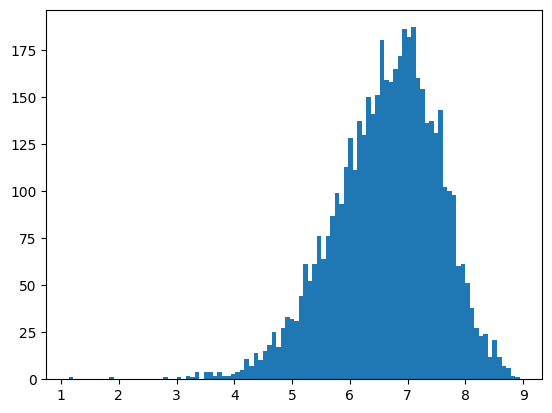

In [34]:
# trực quan phân bố color_distance
import matplotlib.pyplot as plt
plt.hist(list_color_distance, bins=100)
plt.show()


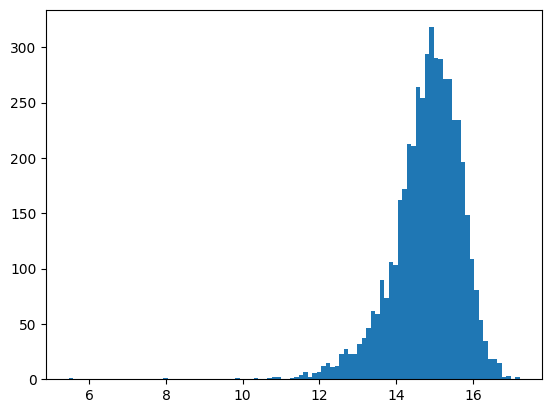

In [35]:
# trực quan phân bố color_distance
import matplotlib.pyplot as plt
plt.hist(list_hog_distance, bins=100)
plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame({'color_distance': list_color_distance, 'hog_distance': list_hog_distance})
df.describe().loc[['mean', 'std', 'min', 'max']]

,color_distance,hog_distance
mean,6.630225,14.806848
std,0.909709,0.884638
min,1.131135,5.463728
max,8.937278,17.216010


In [22]:
from PIL import Image
import numpy as np
from Feature import Feature

def calculateRGBHistogram(image, num_bins):
        value_bin = 256 / num_bins
        histogram_of_red    = np.zeros(num_bins)
        histogram_of_green  = np.zeros(num_bins)
        histogram_of_blue   = np.zeros(num_bins)

        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                histogram_of_red[int(image[i][j][0] / 256 * value_bin)] += 1
                histogram_of_green[int(image[i][j][1] / 256 * value_bin)] += 1
                histogram_of_blue[int(image[i][j][2] / 256 * value_bin)] += 1

        return histogram_of_red, histogram_of_green, histogram_of_blue

image = Image.open('./Flower/hoa cúc huân chương/hoa cúc huân chương01.png')
image = np.array(image)
histogram_of_red, histogram_of_green, histogram_of_blue = calculateRGBHistogram(image[48:64,48:64], 16)
print()
    

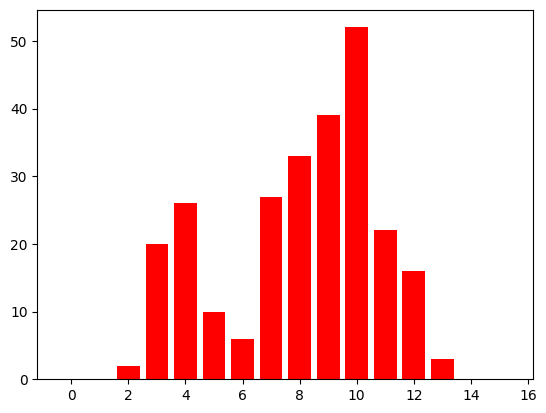

In [23]:

import matplotlib.pyplot as plt
plt.bar(range(16), histogram_of_red, color='red')
plt.show()


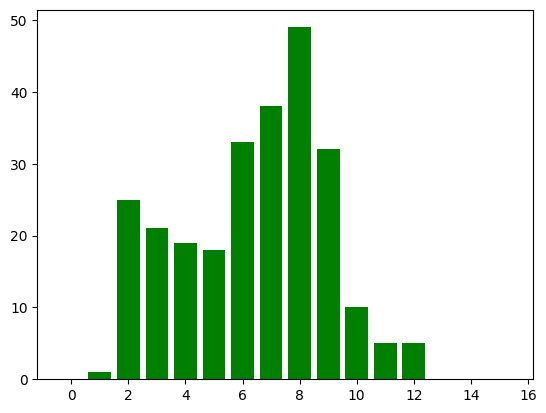

In [24]:
plt.bar(range(16), histogram_of_green, color='green')
plt.show()

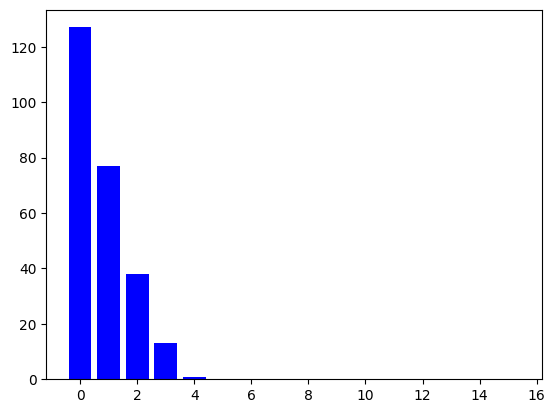

In [25]:
plt.bar(range(16), histogram_of_blue, color='blue')
plt.show()

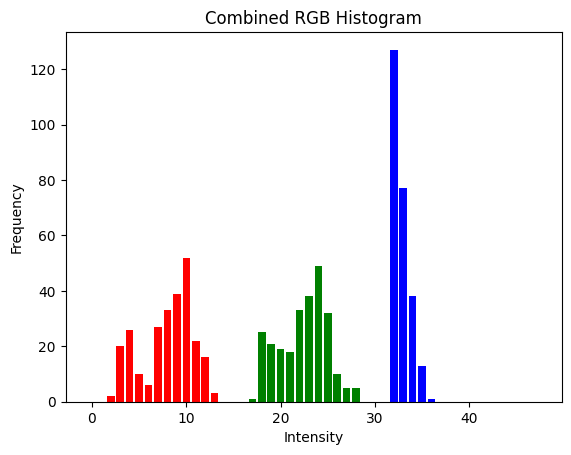

In [29]:
combined_histogram = np.concatenate((histogram_of_red, histogram_of_green, histogram_of_blue))
fig, ax = plt.subplots()
ax.set_title('Combined RGB Histogram')
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.bar(range(len(combined_histogram)), combined_histogram, color=['red']*16 + ['green']*16 + ['blue']*16)
plt.show()

<BarContainer object of 48 artists>

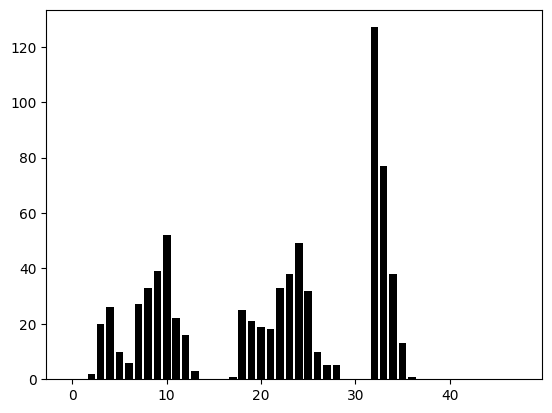

In [30]:
plt.bar(range(48), combined_histogram, color='black')